# PyCHO Geopandas Workshop

In [ ]:
!conda install --yes geopandas descartes folium contextily
#!pip install geopandas descartes folium contextily

In [1]:
import pandas as pd
import geopandas as gpd
import descartes
import contextily
import matplotlib.pyplot as plt
import folium

/Users/ep9k/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


# Open Police Data

[OpenPoliceData](https://github.com/openpolicedata/openpolicedata) is a Python package that provides easy access to 282 (and growing) incident-level open datasets from police departments around the United States. Datasets include traffic stops, use of force, officer-involved shootings, complaints, and other types of police interactions.

Users request data by department name and type of data. The data is returned as a pandas DataFrame. There is no need to manually find the data online or make API calls. 

In [ ]:
!pip install openpolicedata

In [2]:
import openpolicedata as opd

In [3]:
data = opd.Source(source_name="Virginia")

In [4]:
data.datasets

,State,SourceName,Agency,AgencyFull,TableType,Year,Description,DataType,URL,date_field,dataset_id,agency_field,min_version,readme
0,Virginia,Virginia,MULTI,NaN,STOPS,MULTI,A data collection consisting of all traffic and investigatory stops made in Virginia as aggregated by Virginia Department of State Police,Socrata,data.virginia.gov,incident_date,2c96-texw,agency_name,<NA>,https://data.virginia.gov/api/views/2c96-texw/files/3f2e466d-eaff-4a74-8ba6-ca97ab28597c?download=true&filename=Community%20Policing%20Data%20Instructions%20&%20Technical%20Specifications%20v5.2.pdf


In [15]:
agencies_richmond = data.get_agencies(partial_name="Richmond")
agencies_charlottesville = data.get_agencies(partial_name="Charlottesville")
agencies_virginia_beach = data.get_agencies(partial_name="Virginia Beach")
agencies_alexandria = data.get_agencies(partial_name="Alexandria")
agencies_arlington = data.get_agencies(partial_name="Arlington")
agencies_norfolk = data.get_agencies(partial_name="Norfolk")
agencies_newport_news = data.get_agencies(partial_name="Newport News")
agencies_chesapeake = data.get_agencies(partial_name="Chesapeake")
agencies_roanoke = data.get_agencies(partial_name="Roanoke")
agencies_lynchburg = data.get_agencies(partial_name="Lynchburg")

print(agencies_richmond)
print()
print(agencies_charlottesville)
print()
print(agencies_virginia_beach)
print()
print(agencies_alexandria)
print()
print(agencies_arlington)
print()
print(agencies_norfolk)
print()
print(agencies_newport_news)
print()
print(agencies_chesapeake)
print()
print(agencies_roanoke)
print()
print(agencies_lynchburg)



['University Of Richmond Police Department', 'Richmond Police Department', "Richmond County Sheriff's Office", 'Richmond International Airport Police']

['Charlottesville Police Department', 'Charlottesville Albemarle Airport Police Department']

["Virginia Beach City Sheriff's Office", 'Virginia Beach Police Department']

["Alexandria City Sheriff's Office", 'Alexandria Police Department']

["Arlington County Sheriff's Office", 'Arlington County Police Department']

['Norfolk Airport Authority Police Department', 'Norfolk Southern Police Department', 'Norfolk Police Department', 'Norfolk State University Police Department', "Norfolk City Sheriff's Office"]

["Newport News City Sheriff's Office", 'Newport News/Williamsburg International Airport Police', 'Newport News Police Department']

['Chesapeake Bay Bridge-Tunnel Police Department', "Chesapeake City Sheriff's Office", 'Chesapeake Police Department']

['Roanoke County Police Department', 'Roanoke City Police Department', 'Roanoke-B

<b>Just to give you a preview, the table object for each agency's dataset looks like this.</b>

In [26]:
agency = "Richmond Police Department"
table = data.load_from_url(year=2021, table_type='STOPS', agency=agency)
print(table)

print()

print(type(table))

state: Virginia,
source_name: Virginia,
agency: Richmond Police Department,
table_type: TableType.STOPS,
year: 2021,
description: A data collection consisting of all traffic and investigatory stops made in Virginia as aggregated by Virginia Department of State Police,
url: data.virginia.gov

<class 'openpolicedata.data.Table'>


In [27]:
police_data_tables = {}

agencies = ['Richmond Police Department', 'Charlottesville Police Department', 'Virginia Beach Police Department', 'Alexandria Police Department',
           'Norfolk Police Department', 'Newport News Police Department', 'Chesapeake Police Department', 'Roanoke City Police Department', 'Lynchburg Police Department']

for agency in agencies:
    # get police data for each city in the form of a table
    police_data = data.load_from_url(year=2021, table_type='STOPS', agency=agency)
    # add this as key/value pair to dictionary
    police_data_tables[agency] = police_data
    

state: Virginia,
source_name: Virginia,
agency: Charlottesville Police Department,
table_type: TableType.STOPS,
year: 2021,
description: A data collection consisting of all traffic and investigatory stops made in Virginia as aggregated by Virginia Department of State Police,
url: data.virginia.gov

<b>To give another example of the table inside this table object, it is a pandas dataframe!</b>

In [31]:
richmond_df = table.table
print(type(richmond_df))


<class 'pandas.core.frame.DataFrame'>


In [32]:
richmond_df

,incident_date,agency_name,jurisdiction,reason_for_stop,race,ethnicity,age,gender,action_taken,violation_type,specific_violation,person_searched,vehicle_searched,additional_arrest,person_type,english_speaking,physical_force_by_officer,physical_force_by_subject
0,2021-01-01,Richmond Police Department,RICHMOND CITY,EQUIPMENT VIOLATION,BLACK OR AFRICAN AMERICAN,UNKNOWN,29,MALE,WARNING,COMMONWEALTH,46.2-1003,NO,NO,NO,NaN,NaN,NaN,NaN
1,2021-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,BLACK OR AFRICAN AMERICAN,UNKNOWN,30,FEMALE,WARNING,COMMONWEALTH,NaN,NO,NO,NO,NaN,NaN,NaN,NaN
2,2021-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,BLACK OR AFRICAN AMERICAN,UNKNOWN,0,FEMALE,WARNING,COMMONWEALTH,46.2-104,NO,NO,NO,NaN,NaN,NaN,NaN
3,2021-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,19,MALE,CITATION/SUMMONS,COMMONWEALTH,46.2-862,NO,NO,NO,NaN,NaN,NaN,NaN
4,2021-01-01,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,WHITE,NON-HISPANIC,52,MALE,WARNING,COMMONWEALTH,46.2-862,NO,NO,NO,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,2021-12-31,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,BLACK OR AFRICAN AMERICAN,NON-HISPANIC,62,FEMALE,CITATION/SUMMONS,NaN,46.2-646,NO,NO,NaN,DRIVER,YES,NO,NO
5232,2021-12-31,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,WHITE,HISPANIC,27,MALE,CITATION/SUMMONS,NaN,46.2-821,NO,NO,NaN,DRIVER,NO,NO,NO
5233,2021-12-31,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,WHITE,UNKNOWN,25,MALE,WARNING,NaN,46.2-852,NO,NO,NaN,DRIVER,NO,NO,NO
5234,2021-12-31,Richmond Police Department,RICHMOND CITY,TRAFFIC VIOLATION,BLACK OR AFRICAN AMERICAN,UNKNOWN,24,MALE,WARNING,NaN,46.2-833,NO,NO,NaN,DRIVER,NO,NO,NO


In [34]:
richmond_df['reason_for_stop'].value_counts()

TRAFFIC VIOLATION      4612
EQUIPMENT VIOLATION     496
OTHER                    41
CHECK POINT              39
TERRY STOP               30
CALLS FOR SERVICE        18
Name: reason_for_stop, dtype: int64

## City of Richmond GIS Data

[From Richmond GeoHub](https://richmond-geo-hub-cor.hub.arcgis.com/)

In [35]:
# this is the relative path to where the data is stored
my_path = './GIS_Data'  

<AxesSubplot:>

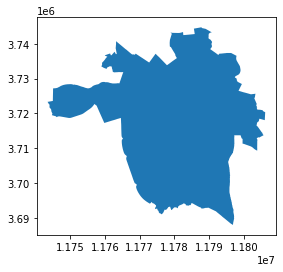

In [37]:
richmond_boundary = gpd.read_file(my_path + "/city_boundaries/Richmond_City_Boundary.shp")
richmond_boundary.plot()

### Add a basemap

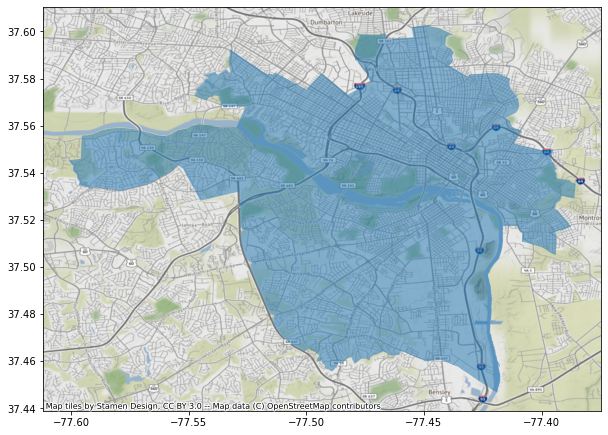

In [54]:
# find this code in geopanda docs: https://geopandas.org/en/stable/gallery/plotting_basemap_background.html?highlight=basemap

ax = richmond_boundary.plot(figsize=(10,8), alpha=0.5)
contextily.add_basemap(ax, crs=richmond_boundary.crs)

<AxesSubplot:>

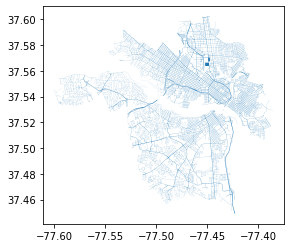

In [42]:
roads = gpd.read_file(my_path + '/Richmond_Roads.geojson')
roads.plot()

### Overlay Multiple Layers

You can put things on top of eachother just as you would in matplotlib

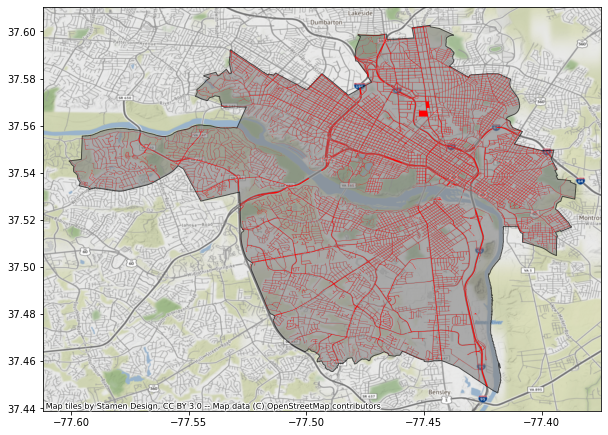

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))
richmond_boundary.plot(ax=ax, color="gray", edgecolor='black', alpha=0.6)
roads.plot(ax=ax, color="red")
contextily.add_basemap(ax=ax, crs=richmond_boundary.crs)

# GeoPandas GeoDataFrames

A GeoPandas GeoDataFrame is an extension to the pandas dataframe object. A GeoDataFrame has a 'geometry' column that stores the spatial geometry of the object.

In [51]:
roads_clip = roads.iloc[:5]
roads_clip

,OBJECTID,Paved,FIPS,CreatedBy,CreatedDate,EditBy,EditDate,GlobalID,Shape__Area,Shape__Length,geometry
0,11446,Yes,760,richmondvagis,2023-01-10 19:59:51.875000+00:00,richmondvagis,2023-01-10 19:59:51.875000+00:00,5c9bc69f-5b75-4f27-8744-633a297076f7,16.011719,41.711297,"POLYGON ((-77.51269 37.52309, -77.51275 37.52307, -77.51283 37.52305, -77.51286 37.52304, -77.51286 37.52304, -77.51283 37.52306, -77.51275 37.52308, -77.51270 37.52309, -77.51269 37.52309))"
1,11447,Yes,760,richmondvagis,2023-01-10 19:59:51.875000+00:00,richmondvagis,2023-01-10 19:59:51.875000+00:00,19fb3b53-e8f6-4148-aee0-e627fb4bd93d,14.808594,37.559407,"POLYGON ((-77.51240 37.52315, -77.51256 37.52312, -77.51256 37.52312, -77.51242 37.52315, -77.51241 37.52316, -77.51240 37.52315))"
2,11448,Yes,760,richmondvagis,2023-01-10 19:59:51.875000+00:00,richmondvagis,2023-01-10 19:59:51.875000+00:00,31067ae7-06ac-466b-abfc-1cd4509fc3c1,79.066406,89.260827,"POLYGON ((-77.51226 37.52311, -77.51225 37.52311, -77.51215 37.52313, -77.51203 37.52317, -77.51191 37.52321, -77.51190 37.52322, -77.51189 37.52320, -77.51202 37.52315, -77.51206 37.52314, -77.51215 37.52312, -77.51219 37.52312, -77.51224 37.52311, -77.51226 37.52310, -77.51226 37.52311, -77.51226 37.52311, -77.51226 37.52311))"
3,11449,Yes,760,richmondvagis,2023-01-10 19:59:51.875000+00:00,richmondvagis,2023-01-10 19:59:51.875000+00:00,83538cc8-5f3d-43f1-9c8b-2071ead04797,42.101562,56.511747,"POLYGON ((-77.51211 37.52321, -77.51217 37.52319, -77.51234 37.52316, -77.51234 37.52317, -77.51233 37.52317, -77.51219 37.52320, -77.51216 37.52321, -77.51217 37.52322, -77.51213 37.52322, -77.51212 37.52322, -77.51211 37.52321))"
4,11450,Yes,760,richmondvagis,2023-01-10 19:59:51.875000+00:00,richmondvagis,2023-01-10 19:59:51.875000+00:00,74d2f6e6-ac6f-41b3-80c4-18f9e92f051d,44.718750,52.527808,"POLYGON ((-77.51165 37.52334, -77.51165 37.52334, -77.51155 37.52342, -77.51150 37.52346, -77.51150 37.52346, -77.51150 37.52346, -77.51152 37.52344, -77.51151 37.52343, -77.51160 37.52336, -77.51163 37.52335, -77.51165 37.52333, -77.51165 37.52334))"


# Coordinate Reference Systems

In [52]:
richmond_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

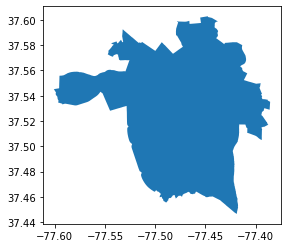

In [53]:
richmond_boundary = richmond_boundary.to_crs(epsg=4326)
richmond_boundary.plot()

In [64]:
schools = gpd.read_file(my_path + '/Richmond_Public_Schools.geojson')

schools['Type'].value_counts()

Elementary    28
High           7
Middle         7
Specialty      2
Name: Type, dtype: int64

### Add Legend

Matplotlib is smart enough to put a legend where there is space in the map. You can manually specify where it goes if you want.

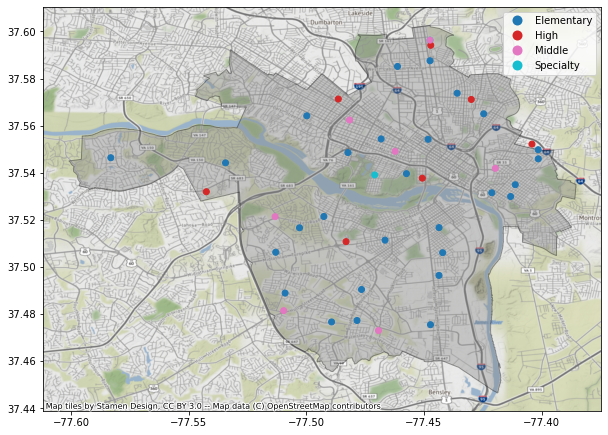

In [71]:

fig, ax = plt.subplots(figsize=(10, 8))
richmond_boundary.plot(ax=ax, color="gray", edgecolor='black', alpha=0.35)
schools.plot(ax=ax, column='Type', categorical=True, legend=True)           # notice the legend!
contextily.add_basemap(ax=ax, crs=schools.crs)

## Bring back the police data

In [99]:
richmond = gpd.read_file(my_path + "/city_boundaries/Richmond_City_Boundary.shp")
richmond = richmond.to_crs(epsg=4326)
charlottesville = gpd.read_file(my_path + "/city_boundaries/Charlottesville_City_Boundary.geojson")
charlottesville = charlottesville.to_crs(epsg=4326)
arlington = gpd.read_file(my_path + "/city_boundaries/Arlington_City_Boundary.gpkg")
arlington = arlington.to_crs(epsg=4326)
alexandria = gpd.read_file(my_path + "/city_boundaries/Alexandria_City_Boundary.geojson")
alexandria = alexandria.to_crs(epsg=4326)
virginia_beach = gpd.read_file(my_path + "/city_boundaries/Virginia_Beach_City_Boundary.geojson")
virginia_beach = virginia_beach.to_crs(epsg=4326)
norfolk = gpd.read_file(my_path + "/city_boundaries/Norfolk_City_Boundary.geojson")
norfolk = norfolk.to_crs(epsg=4326)
newport_news = gpd.read_file(my_path + "/city_boundaries/Newport_News_City_Boundary.gpkg")
newport_news = newport_news.to_crs(epsg=4326)
chesapeake = gpd.read_file(my_path + "/city_boundaries/Chesapeake_City_Boundary.geojson")
chesapeake = chesapeake.to_crs(epsg=4326)
roanoke = gpd.read_file(my_path + "/city_boundaries/Roanoke_City_Boundary.gpkg")
roanoke = roanoke.to_crs(epsg=4326)
lynchburg = gpd.read_file(my_path + "/city_boundaries/Lynchburg_City_Boundary.geojson")
lynchburg = lynchburg.to_crs(epsg=4326)



Expecting property name enclosed in double quotes: line 1 column 2 (char 1)


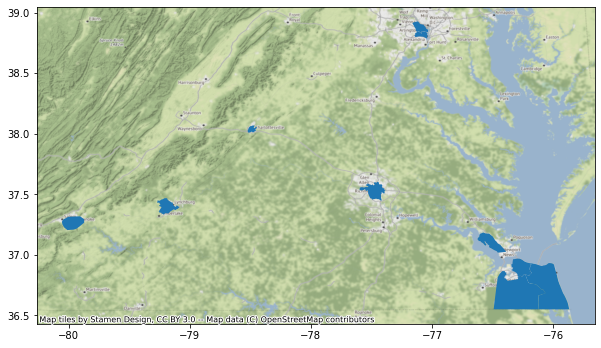

In [100]:
cities = [richmond, charlottesville, arlington, alexandria, virginia_beach, norfolk, newport_news, chesapeake, roanoke, lynchburg]

fig, ax = plt.subplots(figsize=(10, 8))
for i in cities:
    i.plot(ax=ax)
contextily.add_basemap(ax=ax, crs=richmond_boundary.crs)

# Folium - Leaflet.js for python!